# Project: Wrangling and Analyze Data

## Table of contents 
1. [Introduction](#intro)
2. [Gathering Data ](#datagathering)
3. [Assessing Data](#assessingdata)<br>
     3.1 [Visual Assessment](#VisualAssessment)<br>
     3.2 [Programmatic Assessement](#ProgrammaticAssessement)
4. [Cleaning Data](#cleaningdata)
5. [Storing Data](#storingdata)
6. [Analyzing and Visualizing Data](#analyzingandvisualizingdata)
7. [Conclusion](#Conclusion)

<a id='intro'></a>
## 1. Introduction
Real-world data is rarely accurate. I will collect data in a variety of forms and sources using Python and its libraries, evaluate its quality and tidiness, and then clean it. We call this "data wrangling." I'll keep track of my data wrangling activities in a Jupyter Notebook and present them using Python analyses and visualizations.
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates) , also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) . WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

<a id='datagathering'></a>
## 2. Gathering Data 
This is the first step for data wrangling, I will gather all three pieces of data which are the WeRateDogs Twitter archive data, The tweet image predictions and  Additional data from the Twitter API for this project and load them in the notebook.

In [296]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

### 1. The WeRateDogs Twitter archive
I downloaded directly the WeRateDogs Twitter archive data by download (twitter-archive-enhanced.csv) manually then uploaded it and read the data into a pandas DataFrame as following:

In [297]:
# loaded twitter-archive-enhanced.csv dataset 
twitter_archive_df=pd.read_csv('twitter-archive-enhanced.csv')

### 2. The tweet image predictions
I downloaded the tweet image prediction data  (image_predictions.tsv)  programmatically by using the Requests library as following:

In [298]:
# Download the tweet image prediction data (image_predictions.tsv)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [299]:
# Read image_predictions.tsv file 
image_predictions_df=pd.read_csv("image_predictions.tsv",sep="\t")

### 3. Additional data from the Twitter API
I downloaded tweet-json.text file manually then I read it to extract necessary data which is tweet id,retweet count and favorite count, after that I store all of this data with each other in dataframe as following:

In [300]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive_df.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [301]:
# Create a dataframe called df_list to append list of dictionaries
df_list = []
# Read tweet-json.txt file
with open('tweet-json.txt', mode='r') as jsonFile:
    # Extract tweet id,retweet_count and favorite_count 
    for line in jsonFile:
        data = json.loads(line)
        tweet_ID=data['id']
        retweet_count=data['retweet_count']
        favorite_count=data['favorite_count']
         # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_ID,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
# Create a dataframe called tweet_json_df to store all extract data with each other      
tweet_json_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

As a summary of the gathering data step, we gathered three dataframes in different methods which is:
1. twitter_archive_df.
2. image_predictions_df.
3. tweet_json_df. 

<a id='assessingdata'></a>
## 3. Assessing Data

This is the second step for data wrangling, in this step I will assessing the three dataframes that we obtained through the previous gathering data step  in two ways visually by scrolling and programmatically using code to identify data quality issues and data tidiness issues.

<a id='VisualAssessment'></a>
### 3.1 Visual Assessment
This assessment is very simple it is done by scrolling to check the data visually to take a general overview of the dataframes as following:

In [302]:
# General overview of twitter_archive_df dataframe
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [303]:
# General overview of image_predictions_df dataframe
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [304]:
# General overview of tweet_json_df dataframe
tweet_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


<a id='ProgrammaticAssessement'></a>
### 3.2 Programmatic Assessement
This assessment is done by coding utilizing various methods and functions to give information about data quality issues and data tidiness issues as following: 

#### twitter_archive_df dataframe

In [305]:
# Display 3 random samples of entries by using sample() method
twitter_archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1861,675483430902214656,NaN,NaN,2015-12-12 01:12:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675483430...,5,10,None,None,None,None,None
1820,676588346097852417,NaN,NaN,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
918,756651752796094464,NaN,NaN,2016-07-23 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gert. He just wants you to be happy. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756651752...,11,10,Gert,None,None,None,None


In [306]:
# showed a brief summary of the dataframe by using info() method
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [307]:
# provide descriptive statistics for each data column by using describe() method 
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [308]:
# Check for missing data by using isnull() method 
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [309]:
# Check for duplicates data by using duplicated() method
twitter_archive_df.duplicated().sum()

0

In [310]:
# The number of each value in rating_denominator by using value_counts() method
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [311]:
twitter_archive_df.query('rating_denominator == 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [312]:
# The number of each value in rating_numerator by using value_counts() method
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### image_predictions_df dataframe

In [313]:
# Display 3 random samples of entries by using sample() method
image_predictions_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True


In [314]:
# showed a brief summary of the dataframe by using info() method
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [315]:
# provide descriptive statistics for each data column by using describe() method 
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [316]:
# Check for missing data by using isnull() method 
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [317]:
# Check for duplicates data by using duplicated() method
image_predictions_df.duplicated().sum()

0

In [318]:
# Check for duplicates data by using duplicated() method
image_predictions_df.jpg_url.duplicated().sum()

66

#### tweet_json_df dataframe

In [319]:
# Display 3 random samples of entries by using sample() method
tweet_json_df.sample(3)

,tweet_id,retweet_count,favorite_count
102,872486979161796608,9429,41606
1308,707038192327901184,900,2404
456,818145370475810820,3014,13671


In [320]:
# showed a brief summary of the dataframe by using info() method
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [321]:
# provide descriptive statistics for each data column by using describe() method 
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [322]:
# Check for missing data by using isnull() method 
tweet_json_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [323]:
# Check for duplicates data by using duplicated() method
tweet_json_df.duplicated().sum()

0

After we finished both visual and programmatic assessment, we got the following quality and tidiness issues for all three dataframes:

### Quality issues

#### `twitter_archive_df`
1. We only want original ratings (no retweets) that have images, so we should delete retweets and replies.
2. Missing values in the following columns:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.
3. Wrong datatype for tweet_id and timestamp. tweet_id it is a string (object) datatype not integer and timestamp it is a datetime datatype not string (object)
4. (None) value instead of (NaN) value in name column.
5. Invalid values of rating_denominator such as: 120 and 170, because ratings almost always have a denominator of 10.

#### `image_predictions_df`
6. Wrong datatype for tweet_id. tweet_id it is a string (object) datatype not integer. 
7. There are 66 duplicated jpg_url. 
8. Inconsistency in the data in each of the following columns:p1, p2 and p3 some of the data are written in uppercase letters, some in lowercase letters, and some contain a underscore sign (-).
9. Delete wrong predictions.
10. Delete unused column.

#### `tweet_json_df`
10. Wrong datatype for tweet_id. tweet_id it is a string (object) datatype not integer.

### Tidiness issues
#### `twitter_archive_df`
1. The last four columns:doggo, floofer, pupper and puppo should be in one column called dog_stage.
 

#### `image_predictions_df`
2. The following three columns:p1, p2 and p3  should be in one column called breeds_of_dogs.
3. The following three columns:p1_conf, p2_conf and p3_conf should be in one column called dog_prediction_confidence.
4. Combine all three dataframes:twitter_archive_df_copy, image_predictions_df_copy and tweet_json_df_copy into one dataframe based on tweet_id column.
 

<a id='cleaningdata'></a>
## 4. Cleaning Data
This is the third step for data wrangling, in this step we clean all quality and tidiness issues we got from the previous assessing data step.I used the define-code-test framework for each issue as following:
1. Define: In words, describe how you intend to solve the issue.
2. Code: Transform your define step to programming code.
3. Test: Test the code you wrote to make sure it works properly.

In [324]:
# Make copies of original pieces of data by using copy() method
twitter_archive_df_copy=twitter_archive_df.copy()
image_predictions_df_copy=image_predictions_df.copy()
tweet_json_df_copy=tweet_json_df.copy()

## Quality issues
### `twitter_archive_df`
### Issue #1:  
We only want original ratings (no retweets) that have images, so we should delete retweets and replies.

#### Define: 
Delete retweets and replies by using isnull() method, this is done by converting all the 181 non-null values in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp to null values, and converting all the 78 non-null values in in_reply_to_status_id and in_reply_to_user_id to null values as following:

#### Code

In [325]:
# Delete retweets
twitter_archive_df_copy=twitter_archive_df_copy[twitter_archive_df_copy.retweeted_status_id.isnull()]
# Delete replies
twitter_archive_df_copy=twitter_archive_df_copy[twitter_archive_df_copy.in_reply_to_status_id.isnull()]

#### Test

In [326]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [327]:
twitter_archive_df_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #2:
Missing values in the following columns:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.

#### Define
Delete the following columns:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls by using drop() method, We delete these columns because they do not contain any data and also we do not need them in our analysis.

#### Code

In [328]:
# Delete unused columns
twitter_archive_df_copy.drop(columns=["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id"
                                                             ,"retweeted_status_user_id","retweeted_status_timestamp",
                                                             "expanded_urls","source","text"],axis=1, inplace=True)

#### Test

In [329]:
twitter_archive_df_copy.sample(1)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
880,760539183865880579,2016-08-02 18:14:06 +0000,12,10,Atlas,None,None,None,None


### Issue #3:
Wrong datatype for tweet_id and timestamp. tweet_id it is a string (object) datatype not integer and timestamp it is a datetime datatype not string (object).

#### Define
Change tweet_id to object by using astyp() method and change timestamp to datetime by using pd.to_datetime() method as following:

#### Code

In [330]:
# Change tweet_id datatype
twitter_archive_df_copy.tweet_id=twitter_archive_df_copy.tweet_id.astype(str)
# Change timestamp datatype
twitter_archive_df_copy.timestamp=pd.to_datetime(twitter_archive_df_copy.timestamp)

#### Test

In [331]:
twitter_archive_df_copy.dtypes

tweet_id                      object
timestamp             datetime64[ns]
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #4:
**(None)** value instead of **(NaN)** value in name column.

#### Define
Change **(None)** value to **(NaN)** value in name column. by using replace() method. We've changed **(None)** to **(NaN)** even appear programmatically **(NaN)** values.

#### Code

In [332]:
# Change (None) value to (NaN) value
twitter_archive_df_copy.name.replace('None', np.nan, inplace = True)

#### Test

In [333]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


In [334]:
twitter_archive_df_copy.isnull().sum()

tweet_id                0
timestamp               0
rating_numerator        0
rating_denominator      0
name                  603
doggo                   0
floofer                 0
pupper                  0
puppo                   0
dtype: int64

### Issue #5:
Invalid values of rating_denominator such as: 120 and 170, because ratings almost always have a denominator of 10.

#### Define
Delete all rating denominator values that are not equal to **10** by using query() method. We delete it because ratings almost always have a denominator of 10 and as we see in the following cell, denominator of 10 has the higher value counts with 2080, as for the rest remaining denominators deleting them does not affect the data because their number is small.

#### Code

In [335]:
# The number of each value in rating_denominator by using value_counts() method
twitter_archive_df_copy.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [336]:
# Delete all rating denominator values that are not equal to 10 by using query() method
twitter_archive_df_copy=twitter_archive_df_copy.query('rating_denominator == 10')

#### Test

In [337]:
twitter_archive_df_copy.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### `image_predictions_df`
### Issue #6:
Wrong datatype for tweet_id. tweet_id it is a string (object) datatype not integer. 

#### Define
Change tweet_id to object by using astyp() method.

#### Code

In [338]:
# Change tweet_id datatype
image_predictions_df_copy.tweet_id=image_predictions_df_copy.tweet_id.astype(str)

#### Test

In [339]:
image_predictions_df_copy.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #7:
There are 66 duplicated jpg_url .

#### Define
Delete duplicated jpg_url by using drop_duplicates() method.

#### Code

In [340]:
# Check the duplicates in jpg_url
image_predictions_df_copy.jpg_url.duplicated().sum()

66

In [341]:
# Delete duplicated jpg_url by using drop_duplicates() method.
image_predictions_df_copy.drop_duplicates(subset=['jpg_url'],keep='last', inplace=True,)

#### Test

In [342]:
image_predictions_df_copy.jpg_url.duplicated().sum()

0

In [343]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


### Issue #8:
Inconsistency in the data in each of the following columns:p1, p2 and p3 some of the data are written in uppercase letters, some in lowercase letters, and some contain a underscore sign (-).

#### Define 
We solve this issue in two steps:

- Replace the underscore sign (-) with a space by using replace method().
- Make first letter uppercase in each word by using [title()](https://www.w3schools.com/python/ref_string_title.asp) method.

#### Code

In [344]:
# Create a loop for p1,p2 and p3
for i in ["p1","p2","p3"]:
    # Replace the underscore sign (-) with a space by using replace method()
    image_predictions_df_copy[i]=image_predictions_df_copy[i].str.replace('_',' ')
    # Make first letter uppercase in each word by using title() method. 
    image_predictions_df_copy[i]=image_predictions_df_copy[i].str.title()
    

#### Test

In [345]:
image_predictions_df_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


### Issue #9:
Delete wrong predictions.

#### Define 
Delete wrong predictions by using drop() method when p1_dog, p2_dog and p3_dog equal False.

#### Code

In [346]:
# There are 318 wrong predictions
len(image_predictions_df_copy[(image_predictions_df_copy.p1_dog == False) & 
                          (image_predictions_df_copy.p2_dog == False) &
                          (image_predictions_df_copy.p3_dog == False)])

318

In [347]:
# Delete wrong predictions by using drop() method
image_predictions_df_copy.drop(image_predictions_df_copy[(image_predictions_df_copy.p1_dog == False) & 
                          (image_predictions_df_copy.p2_dog == False) &
                          (image_predictions_df_copy.p3_dog == False)].index, inplace=True)

#### Test

In [348]:
len(image_predictions_df_copy[(image_predictions_df_copy.p1_dog == False) & 
                          (image_predictions_df_copy.p2_dog == False) &
                          (image_predictions_df_copy.p3_dog == False)])

0

### Issue #10:
Delete unused column.

#### Define 
Delete img_num column by using drop() method.

#### Code

In [349]:
# Delete unused column.
image_predictions_df_copy.drop(columns=["img_num"],axis=1, inplace=True)

#### Test

In [350]:
list(image_predictions_df_copy)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### `tweet_json_df_copy`
### Issue #11:
Wrong datatype for tweet_id. tweet_id it is a string (object) datatype not integer

#### Define 
Change tweet_id to object by using astyp() method.

#### Code

In [351]:
# Change tweet_id datatype
tweet_json_df_copy.tweet_id=tweet_json_df_copy.tweet_id.astype(str)

#### Test

In [352]:
tweet_json_df_copy.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

## Tidiness issues
### `twitter_archive_df`
### Issue #1: 
The last four columns:doggo, floofer, pupper and puppo should be in one column called dog_stage.

#### Define
Combine the following four columns:doggo, floofer, pupper and puppo into a single column called dog_stage by using melt() method.

#### Code

In [353]:
# Combine four columns by using melt() method.
twitter_archive_df_copy = pd.melt(twitter_archive_df_copy, 
                                id_vars = ['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name'],  
                                value_name = 'dog_stage',
                                  var_name= 'stage')

In [354]:
# Delete type column
twitter_archive_df_copy.drop(columns=["stage"], axis= 1, inplace = True)

In [355]:
# Sort by using sort_values() then drop duplicates by using drop_duplicates() based on tweet id
twitter_archive_df_copy = twitter_archive_df_copy.sort_values("dog_stage").drop_duplicates("tweet_id", keep="last")

#### Test

In [356]:
list(twitter_archive_df_copy)

['tweet_id',
 'timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [357]:
twitter_archive_df_copy.dog_stage.value_counts()

None       1744
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### `image_predictions_df_copy`
### Issue #2:

The following three columns:p1, p2 and p3  should be in one column called breeds_of_dogs.

#### Define
Create a function to combine the following three columns:p1, p2 and p3 in one column called breeds_of_dogs, then delete p1, p2 and p3 columns.

#### Code

In [358]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1691 non-null object
jpg_url     1691 non-null object
p1          1691 non-null object
p1_conf     1691 non-null float64
p1_dog      1691 non-null bool
p2          1691 non-null object
p2_conf     1691 non-null float64
p2_dog      1691 non-null bool
p3          1691 non-null object
p3_conf     1691 non-null float64
p3_dog      1691 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 123.9+ KB


In [359]:
image_predictions_df_copy

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden Retriever,0.775930,True,Tibetan Mastiff,0.093718,True,Labrador Retriever,0.072427,True


In [360]:
# Create a list to append dog prediction informations 
prediction_list = []

# Create a prediction function 
def prediction(image_predictions_df_copy):
    if image_predictions_df_copy.p1_dog == True: 
     prediction_list.append(image_predictions_df_copy.p1)
    elif image_predictions_df_copy.p2_dog == True: 
     prediction_list.append(image_predictions_df_copy.p2)
    elif image_predictions_df_copy.p3_dog == True: 
     prediction_list.append(image_predictions_df_copy.p3)
    else:
        prediction_list.append(np.NaN)
        
# Use apply() method to apply prediction function.
image_predictions_df_copy.apply(prediction, axis=1)

# Add column called breeds_of_dogs 
image_predictions_df_copy['breeds_of_dogs'] = prediction_list

In [361]:
image_predictions_df_copy

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breeds_of_dogs
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,Bernese Mountain Dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden Retriever,0.775930,True,Tibetan Mastiff,0.093718,True,Labrador Retriever,0.072427,True,Golden Retriever


In [362]:
# Delete p1, p2 and p3 columns
image_predictions_df_copy.drop(columns=["p1","p2","p3"],axis=1, inplace=True)

#### Test

In [363]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 9 columns):
tweet_id          1691 non-null object
jpg_url           1691 non-null object
p1_conf           1691 non-null float64
p1_dog            1691 non-null bool
p2_conf           1691 non-null float64
p2_dog            1691 non-null bool
p3_conf           1691 non-null float64
p3_dog            1691 non-null bool
breeds_of_dogs    1691 non-null object
dtypes: bool(3), float64(3), object(3)
memory usage: 97.4+ KB


### Issue #3:

The following three columns:p1_conf, p2_conf and p3_conf should be in one column called dog_prediction_confidence.

#### Define
Create a function to combine the following three columns:p1_conf, p2_conf and p3_conf in one column called dog_prediction_confidence, then delete p1_conf, p2_conf, p3_conf,p1_dog, p2_dog and p3_dog columns.

#### Code

In [364]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 9 columns):
tweet_id          1691 non-null object
jpg_url           1691 non-null object
p1_conf           1691 non-null float64
p1_dog            1691 non-null bool
p2_conf           1691 non-null float64
p2_dog            1691 non-null bool
p3_conf           1691 non-null float64
p3_dog            1691 non-null bool
breeds_of_dogs    1691 non-null object
dtypes: bool(3), float64(3), object(3)
memory usage: 97.4+ KB


In [365]:
image_predictions_df_copy

,tweet_id,jpg_url,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,breeds_of_dogs
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,True,0.156665,True,0.061428,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,True,0.074192,True,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,True,0.138584,True,0.116197,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,True,0.360687,True,0.222752,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,True,0.243682,True,0.154629,True,Miniature Pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,0.651137,True,0.263788,True,0.016199,True,Bernese Mountain Dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,0.692517,True,0.058279,True,0.054449,False,Chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,0.962465,False,0.014594,False,0.007959,True,Golden Retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,0.201493,True,0.192305,True,0.082086,True,Miniature Poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,0.775930,True,0.093718,True,0.072427,True,Golden Retriever


In [366]:
# Create a list to append dog prediction confidence informations 
confidence_list = []

# Create a prediction function 
def confidence(image_predictions_df_copy):
    if image_predictions_df_copy.p1_dog == True: 
     confidence_list.append(image_predictions_df_copy.p1_conf)
    elif image_predictions_df_copy.p2_dog == True: 
     confidence_list.append(image_predictions_df_copy.p2_conf)
    elif image_predictions_df_copy.p3_dog == True: 
     confidence_list.append(image_predictions_df_copy.p3_conf)
    else:
        confidence_list.append(np.NaN)
        
# Use apply() method to apply confidence function.
image_predictions_df_copy.apply(confidence, axis=1)

# Add column called dog_prediction_confidence. 
image_predictions_df_copy['dog_prediction_confidence'] = confidence_list

In [367]:
image_predictions_df_copy

,tweet_id,jpg_url,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,breeds_of_dogs,dog_prediction_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,True,0.156665,True,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,True,0.074192,True,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,True,0.138584,True,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,True,0.360687,True,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,True,0.243682,True,0.154629,True,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,0.651137,True,0.263788,True,0.016199,True,Bernese Mountain Dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,0.692517,True,0.058279,True,0.054449,False,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,0.962465,False,0.014594,False,0.007959,True,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,0.201493,True,0.192305,True,0.082086,True,Miniature Poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,0.775930,True,0.093718,True,0.072427,True,Golden Retriever,0.775930


In [368]:
# Delete p1_conf, p2_conf and p3_conf columns
# Delete p1_dog, p2_dog and p3_dog columns
image_predictions_df_copy.drop(columns=["p1_conf","p2_conf","p3_conf",
                                        "p1_dog","p2_dog","p3_dog"],axis=1, inplace=True)

#### Test

In [369]:
image_predictions_df_copy.head()

,tweet_id,jpg_url,breeds_of_dogs,dog_prediction_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311


In [370]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id                     1691 non-null object
jpg_url                      1691 non-null object
breeds_of_dogs               1691 non-null object
dog_prediction_confidence    1691 non-null float64
dtypes: float64(1), object(3)
memory usage: 66.1+ KB


### Issue #4:
Combine all three dataframes:twitter_archive_df_copy, image_predictions_df_copy and tweet_json_df_copy into one dataframe based on tweet_id column.

#### Define
Combine our dataframes by using merge() method, as following:

- Combine image_predictions_df_copy and tweet_json_df_copy into one dataframe called general_df1.
- Combine general_df1 and twitter_archive_df_copy into one dataframe called general_df2.

#### Code

In [371]:
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 2005 to 7070
Data columns (total 6 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1488 non-null object
dog_stage             2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 113.8+ KB


In [372]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id                     1691 non-null object
jpg_url                      1691 non-null object
breeds_of_dogs               1691 non-null object
dog_prediction_confidence    1691 non-null float64
dtypes: float64(1), object(3)
memory usage: 66.1+ KB


In [373]:
tweet_json_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [374]:
# Combine image_predictions_df_copy and tweet_json_df_copy into one dataframe called general_df1.
general_df1=pd.merge(image_predictions_df_copy, tweet_json_df_copy,
                            on=['tweet_id'], how='left')

In [375]:
general_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1690
Data columns (total 6 columns):
tweet_id                     1691 non-null object
jpg_url                      1691 non-null object
breeds_of_dogs               1691 non-null object
dog_prediction_confidence    1691 non-null float64
retweet_count                1690 non-null float64
favorite_count               1690 non-null float64
dtypes: float64(3), object(3)
memory usage: 92.5+ KB


In [376]:
general_df1

,tweet_id,jpg_url,breeds_of_dogs,dog_prediction_confidence,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,147.0,311.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,41.0,111.0
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,0.651137,60.0,136.0
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517,261.0,448.0
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden Retriever,0.007959,146.0,304.0
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,0.201493,61.0,115.0
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden Retriever,0.775930,232.0,496.0


In [377]:
# Combine general_df1 and twitter_archive_df_copy into one dataframe called general_df2.
general_df2=pd.merge(general_df1, twitter_archive_df_copy,
                            on=['tweet_id'], how='left')

#### Test

In [378]:
general_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1690
Data columns (total 11 columns):
tweet_id                     1691 non-null object
jpg_url                      1691 non-null object
breeds_of_dogs               1691 non-null object
dog_prediction_confidence    1691 non-null float64
retweet_count                1690 non-null float64
favorite_count               1690 non-null float64
timestamp                    1590 non-null datetime64[ns]
rating_numerator             1590 non-null float64
rating_denominator           1590 non-null float64
name                         1216 non-null object
dog_stage                    1590 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 158.5+ KB


<a id='storingdata'></a>
## 5. Storing Data
In this step, I will save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter archive master.csv" as follows:

In [379]:
# Save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter archive master.csv"
general_df2.to_csv("twitter_archive_master.csv")

<a id='analyzingandvisualizingdata'></a>
## 6. Analyzing and Visualizing Data
In this step, I will analyze and visualize the wrangled data I done before by asking some questions as following:
1. What is the highest dog stage and lowest dog stage?
2. What are the five highest breeds of dogs?
3. Is there a relationship between favorite count and retweet count for breeds of dogs?
4. What is the most common numerator?

In [380]:
# loaded twitter archive master.csv dataset 
twitter_archive_master_df =pd.read_csv("twitter_archive_master.csv")
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
Unnamed: 0                   1691 non-null int64
tweet_id                     1691 non-null int64
jpg_url                      1691 non-null object
breeds_of_dogs               1691 non-null object
dog_prediction_confidence    1691 non-null float64
retweet_count                1690 non-null float64
favorite_count               1690 non-null float64
timestamp                    1590 non-null object
rating_numerator             1590 non-null float64
rating_denominator           1590 non-null float64
name                         1216 non-null object
dog_stage                    1590 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 158.6+ KB


In [381]:
# Delete Unnamed: 0 column
twitter_archive_master_df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [382]:
twitter_archive_master_df.sample(5)

,tweet_id,jpg_url,breeds_of_dogs,dog_prediction_confidence,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_stage
830,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,Great Pyrenees,0.720337,1440.0,4802.0,2016-03-25 17:03:49,11.0,10.0,NaN,None
340,674793399141146624,https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg,Giant Schnauzer,0.119693,1225.0,2697.0,NaN,NaN,NaN,NaN,NaN
1193,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,Briard,0.504427,6470.0,18630.0,2016-10-01 19:47:08,12.0,10.0,Sampson,doggo
307,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,Pembroke,0.742320,714.0,1676.0,2015-12-07 23:55:26,11.0,10.0,Aiden,None
127,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,Cocker Spaniel,0.367492,77.0,300.0,2015-11-24 00:54:05,10.0,10.0,a,None


In [383]:
# Correct wrong datatype
# Change tweet_id datatype
twitter_archive_master_df.tweet_id=twitter_archive_master_df.tweet_id.astype(str)
# Change timestamp datatype
twitter_archive_master_df.timestamp=pd.to_datetime(twitter_archive_master_df.timestamp)
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 11 columns):
tweet_id                     1691 non-null object
jpg_url                      1691 non-null object
breeds_of_dogs               1691 non-null object
dog_prediction_confidence    1691 non-null float64
retweet_count                1690 non-null float64
favorite_count               1690 non-null float64
timestamp                    1590 non-null datetime64[ns]
rating_numerator             1590 non-null float64
rating_denominator           1590 non-null float64
name                         1216 non-null object
dog_stage                    1590 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 145.4+ KB


### Insights and Visualizations

### 1. What is the highest dog stage and lowest dog stage?

In [384]:
twitter_archive_master_df.dog_stage.value_counts()

None       1342
pupper      168
doggo        51
puppo        21
floofer       8
Name: dog_stage, dtype: int64

In [385]:
# Extract empty (None) data
highest_dog_stage=twitter_archive_master_df.dog_stage[twitter_archive_master_df.dog_stage.values !="None"]

In [386]:
# Number of values for each dog stage
highest_dog_stage.value_counts()

pupper     168
doggo       51
puppo       21
floofer      8
Name: dog_stage, dtype: int64

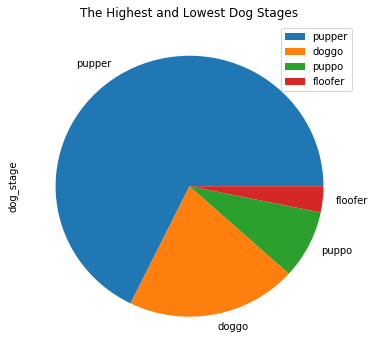

In [387]:
# Plot pie chart
highest_dog_stage.value_counts().plot(kind='pie',figsize=(6,6));
plt.title('The Highest and Lowest Dog Stages')
plt.legend()
plt.show();

>So as shown in the above pie chart:
- The highest dog stage is  pupper.
- The lowest dog stage is floofer.

### 2. What are the five highest  breeds of dogs?

In [388]:
# Find the five highest breeds of dogs.
five_highest_breeds_of_dogs=twitter_archive_master_df.breeds_of_dogs.value_counts().sort_values(axis=0,ascending=False).head()
five_highest_breeds_of_dogs

Golden Retriever      158
Labrador Retriever    108
Pembroke               95
Chihuahua              91
Pug                    63
Name: breeds_of_dogs, dtype: int64

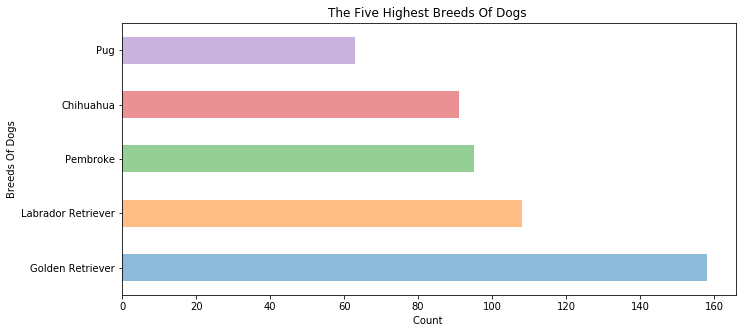

In [389]:
# Plot barh chart
five_highest_breeds_of_dogs.plot(kind='barh',alpha=0.5,figsize=(11,5));
plt.title('The Five Highest Breeds Of Dogs ')
plt.xlabel('Count ')
plt.ylabel('Breeds Of Dogs');

>So as shown in the above barh chart:<br>
The five highest breeds of dogs are:
1. Golden Retriever.
2. Labrador Retriever.
3. Pembroke.
4. Chihuahua.
5. Pug.

### 3. Is there a relationship between favorite count and retweet count for breeds of dogs?

In [390]:
# Compute the mean for retweet_count
retweet_count=twitter_archive_master_df.groupby('breeds_of_dogs').retweet_count.mean()
# Compute the mean for favorite_count
favorite_count=twitter_archive_master_df.groupby('breeds_of_dogs').favorite_count.mean()

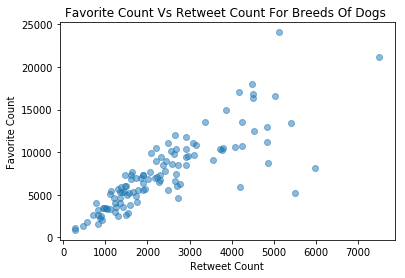

In [391]:
# Used scatter() method to find a relationship between favorite count and retweet count for breeds of dogs
plt.scatter(x=retweet_count, y=favorite_count,alpha=0.5);
plt.title('Favorite Count Vs Retweet Count For Breeds Of Dogs ')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

>So, as shown in the above scatter plot chart:<br>
There is a positive relationship between favorite count and retweet count for breeds of dogs.

### 4. What is the most common numerator ?

In [392]:
# Find the most common numerator 
most_numerator=twitter_archive_master_df.groupby(['rating_numerator']).count()['tweet_id'].sort_values(axis=0,ascending=False)
most_numerator

rating_numerator
12.0    402
10.0    351
11.0    338
13.0    203
9.0     131
8.0      68
7.0      31
14.0     19
6.0      16
5.0      14
4.0       6
3.0       5
2.0       2
75.0      1
27.0      1
26.0      1
0.0       1
Name: tweet_id, dtype: int64

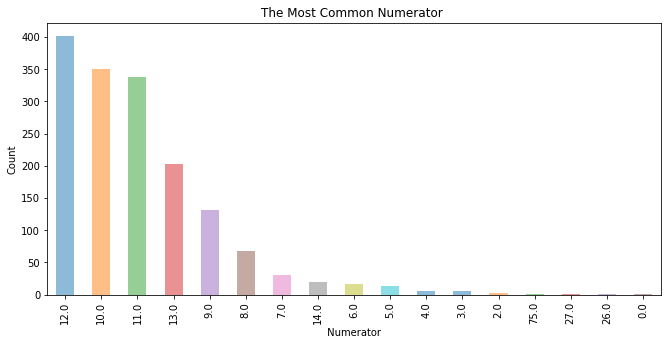

In [393]:
# Plot bar chart
most_numerator.plot(kind="bar",alpha=0.5,figsize=(11,5))
plt.title('The Most Common Numerator ')
plt.xlabel(' Numerator ')
plt.ylabel('Count');

>So, as shown in the above bar chart:<br>
The most common numerator is 12 followed by 10 then 11.

<a id='Conclusion'></a>
## 7. Conclusion

In this project we wrangling and analyze the WeRateDogs data, by the following: gathering data, assessing data, cleaning data, storing data, analyzing and visualizing data. At the end of our wrangling and analyze the data, we got the following insights:
1. The highest dog stage is  pupper.
2. The lowest dog stage is floofer.
3. The five highest breeds of dogs are: 
 - Golden Retriever
 - Labrador Retriever.
 - Pembroke.
 - Chihuahua.
 - Pug.

4. There is a positive relationship between favorite count and retweet count for breeds of dogs.
5. The most common numerator is 12 followed by 10 then 11.